<a href="https://colab.research.google.com/github/SVithurabiman/Vision/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
H=200
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



print('x_train',x_train.shape)
print('x_test',x_test.shape)
std=1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)


batch_size=500
iterations = 301  # Gradient descent interations
lr =1.2e-2
lr_decay=0.999
reg =1e-6
lr_hist = []
loss_history = [] # Vlaues of loss function at each iteration 
train_acc_history = [] # Training accuracy
val_acc_history = [] # Validation accuracy
batchloss_history=[]
seed=0
rng = np.random.default_rng(seed=seed)
test_loss=[]
for t in range(iterations):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  x = x_train[indices]
  y = y_train[indices]
  loss=0
  for l in range(0,Ntr,batch_size):
    h=1.0/(1.0+np.exp(-(x[l:(l+batch_size)].dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    batchloss = (1./batch_size)*np.square(y_pred-y[l:(l+batch_size)]).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    batchloss_history.append(batchloss/100)
    loss+=batchloss/100
    dy_pred = (1.0/batch_size)*2.0*(y_pred-y[l:(l+batch_size)])
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x[l:(l+batch_size)].T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -=lr*db1
    b2 -= lr*db2
    lr = lr*lr_decay 
  loss_history.append(loss)
  lr_hist.append(lr)
  x_t=x_train
  h=1/(1+np.exp(-(x_t.dot(w1)+b1)))
  y_pred=h.dot(w2)+b2

  count=[np.argmax(y_pred,axis=1)==np.argmax(y_train,axis=1)]
  train_acc=np.sum(count)/(len(np.argmax(y_train,axis=1)))
  train_acc_history.append(train_acc)


  x_t=x_test

  h=1/(1+np.exp(-(x_t.dot(w1)+b1)))
  y_pred=h.dot(w2)+b2
  valid_pred = [np.argmax(y_pred, axis=1) == np.argmax(y_test,axis=1)]
  temp=np.sum(valid_pred)/len(np.argmax(y_test,axis=1))
   
  val_acc_history.append(temp)


  x=x_test
  y=y_test
  h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
  y_pred = h.dot(w2)+b2
  t_loss = (1./Nte)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
  test_loss.append(t_loss)

  if ((t+1)%10==0) or (t==1) or (t==2) or(t==0):
    print("Epoch",t+1, "|", "Training Loss",loss_history[-1],"|", "Training Acc:",train_acc_history[-1],'|', "Test Loss",test_loss[-1],"|" ,'Validation Acc:',val_acc_history[-1] ,'|','Learning Rate:',lr)








x_train: (50000, 32, 32, 3)
x_train (50000, 3072)
x_test (10000, 3072)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Epoch 1 | Training Loss 0.835708776474043 | Training Acc: 0.36742 | Test Loss 0.798743735916694 | Validation Acc: 0.365 | Learning Rate: 0.01085750576536451
Epoch 2 | Training Loss 0.7863526988519814 | Training Acc: 0.42852 | Test Loss 0.7721133300701184 | Validation Acc: 0.4156 | Learning Rate: 0.009823785953743634
Epoch 3 | Training Loss 0.7667840003966461 | Training Acc: 0.44114 | Test Loss 0.7648347901418011 | Validation Acc: 0.4214 | Learning Rate: 0.008888484385873198
Epoch 10 | Training Loss 0.6969266440847786 | Training Acc: 0.52468 | Test Loss 0.7365239678700968 | Validation Acc: 0.4561 | Learning Rate: 0.004412345097251558
Epoch 20 | Training Loss 0.6396839312873608 | Training Acc: 0.6015 | Test Loss 0.7321450868199431 | Validation Acc: 0.4684 | Learning Rate: 0.0016223991047699924
Epoch 30 | Training Loss 0.6138153801666809 | Training Acc: 0.6314 | Test L

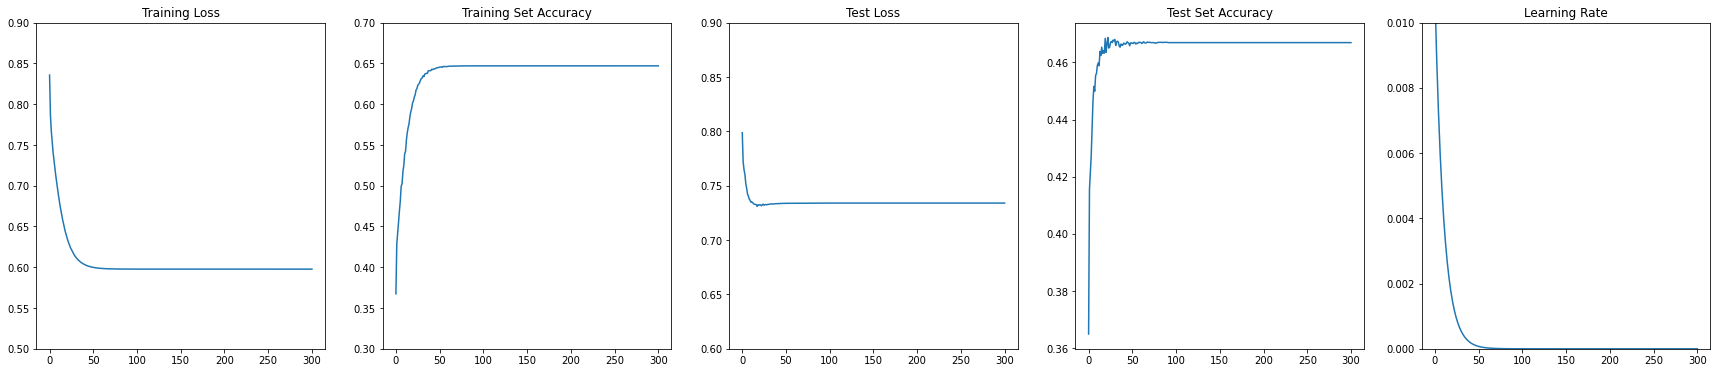

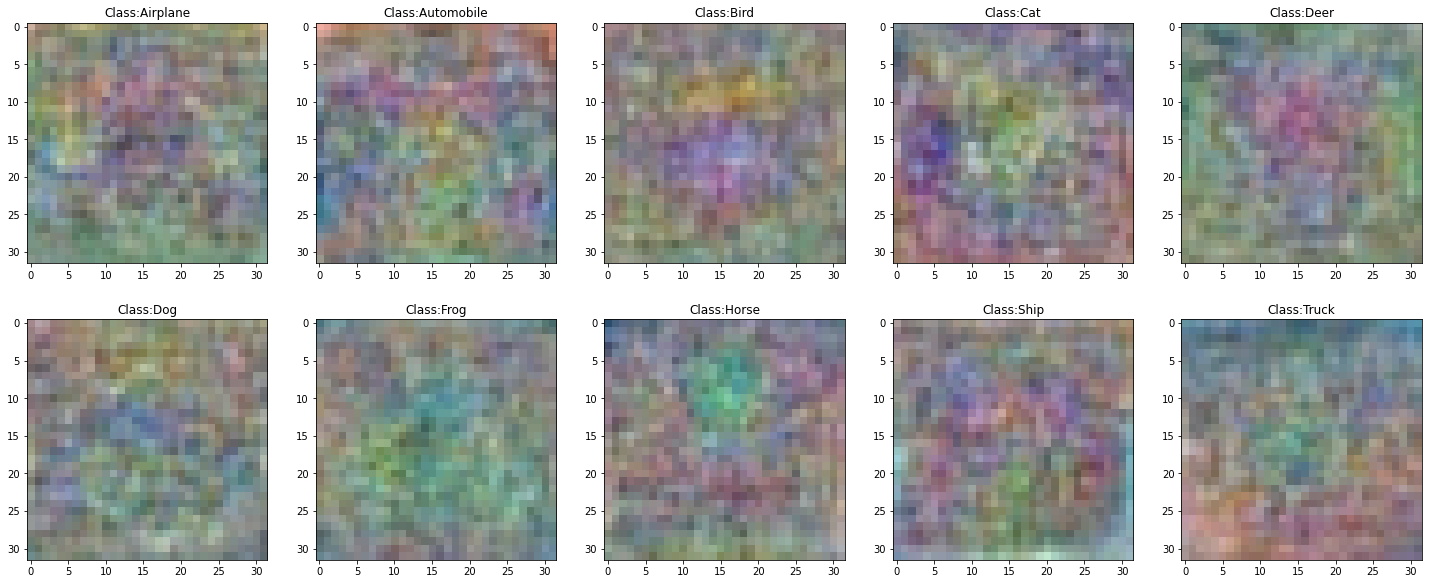

In [59]:
fig, ax = plt.subplots(1,5, figsize=(30,6))
ax[0].plot(loss_history)
ax[0].set_ylim(0.5,0.9)
ax[1].plot(train_acc_history)
ax[1].set_ylim(0.3,0.7)
ax[2].plot(test_loss)
ax[2].set_ylim(0.6,0.9)
ax[3].plot(val_acc_history)
ax[4].plot(lr_hist)
ax[4].set_ylim(0,0.01)


ax[0].set_title('Training Loss')
ax[1].set_title('Training Set Accuracy')
ax[2].set_title('Test Loss')
ax[3].set_title('Test Set Accuracy')
ax[4].set_title('Learning Rate')

weights_pos =  w1- np.min(w1)# Making the minimum weight zero.
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
class_label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
#location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,i+1),plt.imshow(image[:,:,::-1])
    title="Class:"+str(class_label[i])
    plt.title(title) 





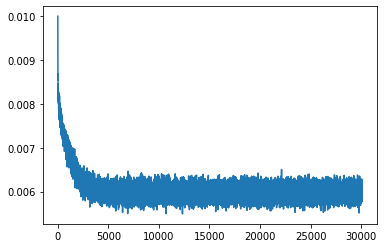

In [60]:
plt.plot(batchloss_history)